In [2]:
# importamos las librerias

import numpy as np
import pandas as pd


In [3]:
# Creamos un DataFrame

df =pd.DataFrame({
    'A':[1, 2, np.nan, 4],
    'B':[5, np.nan, np.nan, 8],
    'C':[9,10, 11, 12]
})

print("DataFrame original")
print(df)


DataFrame original
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12


In [6]:
# Eliminamos las filas, que tengan datos faltantes

df = df.dropna()
print("DataFrame sin filas con datos faltantes")
print(df)

DataFrame sin filas con datos faltantes
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12


In [7]:
# reinicia los indices, para evitar problemas de 0 a 1
# drop=True: Elimina el índice anterior (no lo conserva como una columna). drop=False (por defecto): Conserva el índice anterior como una nueva columna.

df_reset = df.reset_index(drop=True)
print("\nDataFrame después de reset_index(drop=True):")
print(df_reset)


DataFrame después de reset_index(drop=True):
     A    B   C
0  1.0  5.0   9
1  4.0  8.0  12


In [ ]:
#Agregamos nuevas librerias

import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

# configuramos el estilo de seaborn
sns.set_style("whitegrid")

In [11]:
# cargamos dataset Iris

df_iris = sns.load_dataset("iris")

#Verificamos la carga

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Resumen estadístico
# Variables numéricas
df_numericas = df_iris.select_dtypes(include=['float64', 'int64'])

# Variables categóricas
df_categoricas = df_iris.select_dtypes(include=['object', 'category'])

print("Variables numéricas:")
print(df_numericas.columns.tolist())

print("\nVariables categóricas:")
print(df_categoricas.columns.tolist())


Variables numéricas:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Variables categóricas:
['species']


In [14]:
# Estadísticas descriptivas para numéricas
df_numericas.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# Estadísticas básicas para variables categóricas
for columna in df_categoricas.columns:
    print(f"\nDistribución de frecuencias para '{columna}':\n")
    print(df_iris[columna].value_counts())



Distribución de frecuencias para 'species':

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/tmp/ipykernel_73226/2910059915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_iris, palette='pastel')


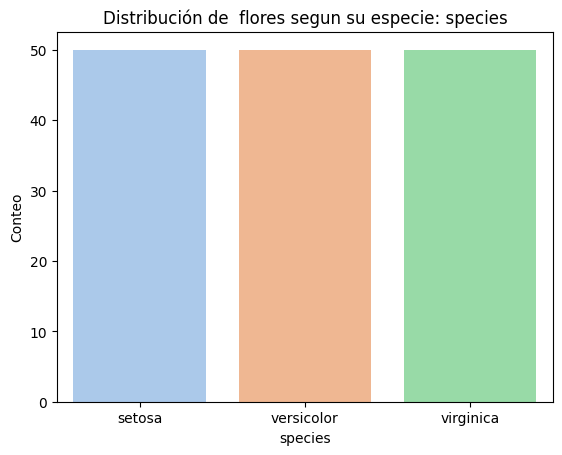

In [ ]:
# Daiagrma de barras para variables categóricas

for columna in df_categoricas.columns:
    sns.countplot(x=columna, data=df_iris, palette='pastel')
    plt.title(f'Distribución de  flores segun su especie: {columna}')
    plt.ylabel('Conteo')
    plt.show()


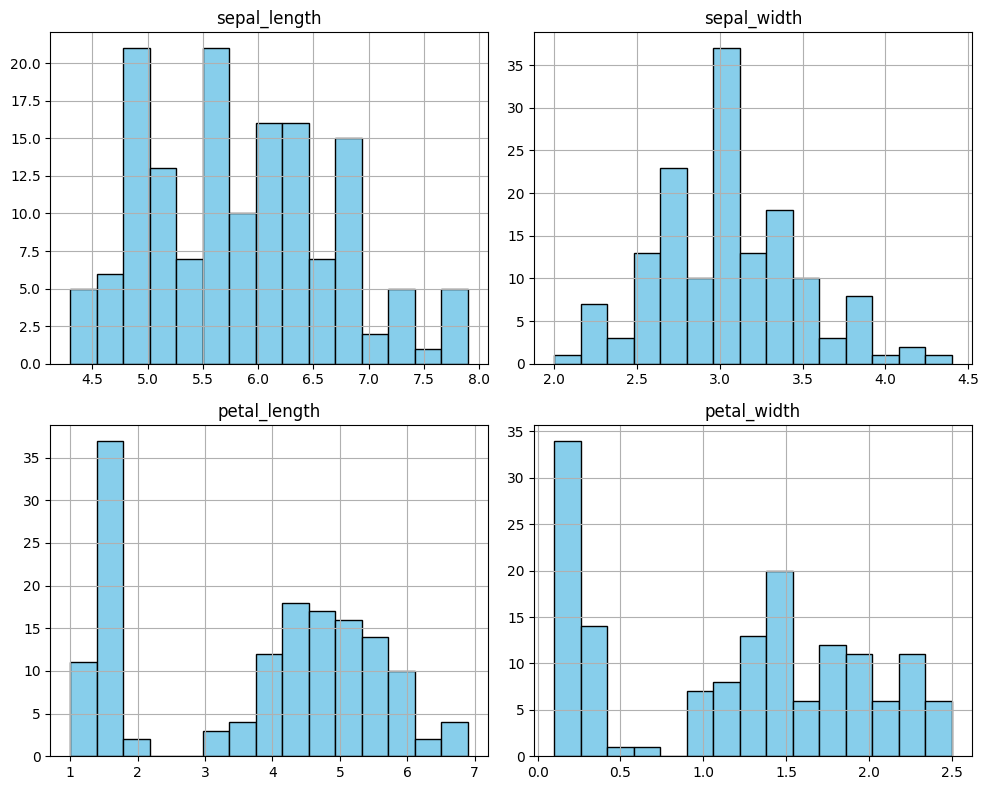

In [19]:
# Histogramas de cada variable numérica
df_numericas.hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


/tmp/ipykernel_73226/1431056784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoria, y=columna, data=df_iris, palette='Set3')


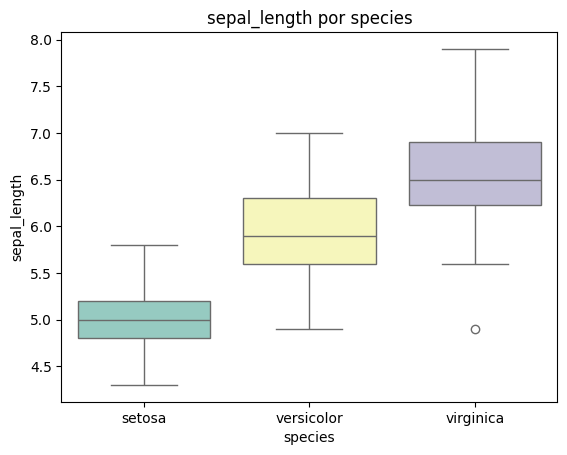

/tmp/ipykernel_73226/1431056784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoria, y=columna, data=df_iris, palette='Set3')


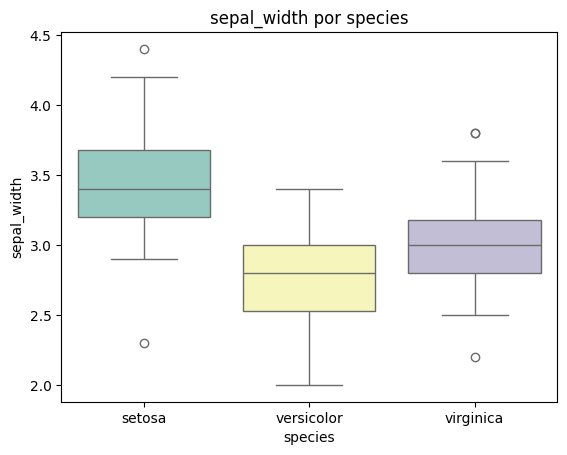

/tmp/ipykernel_73226/1431056784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoria, y=columna, data=df_iris, palette='Set3')


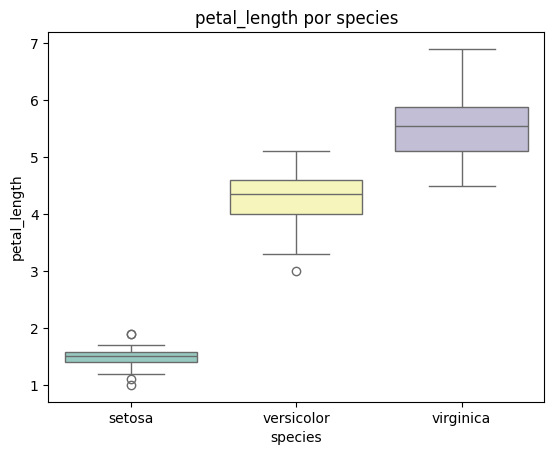

/tmp/ipykernel_73226/1431056784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categoria, y=columna, data=df_iris, palette='Set3')


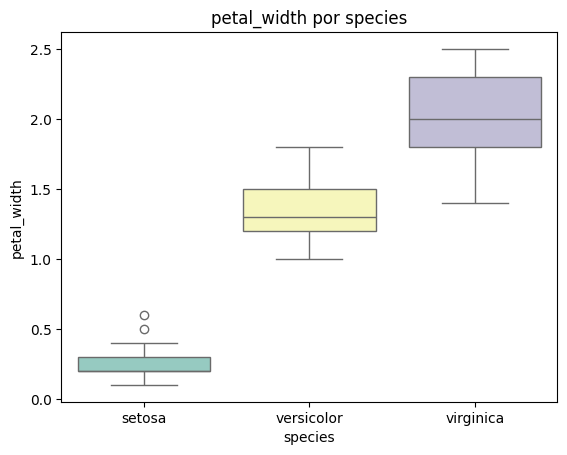

In [20]:
# Boxplot numérico por categoría
categoria = 'species'
for columna in df_numericas.columns:
    sns.boxplot(x=categoria, y=columna, data=df_iris, palette='Set3')
    plt.title(f'{columna} por {categoria}')
    plt.show()

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


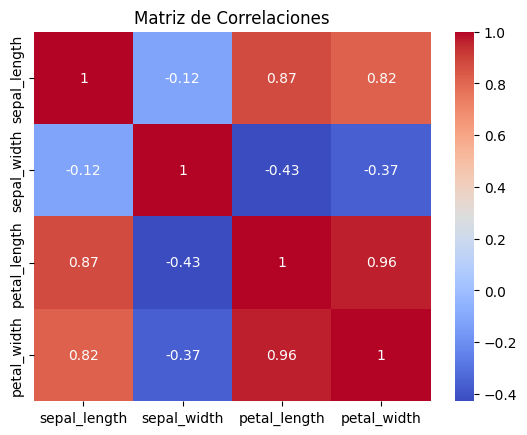

In [22]:
# Select only numerical features for correlation, para hacer el filtro
numerical_df = df_iris.select_dtypes(include=['number'])

# Calcula las correlaciones (.corr es la correlacion de person)
#correlacion = numerical_df.corr()
#print(correlacion)

# Matriz de correlaciones
correlaciones = numerical_df.corr()
print(correlaciones)

# Visualización (mapa de calor)

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()